# Intertemporal Choice

## Antecedents

John Rae "The Sociological Theory of Capital" 1834. Why do people choose to devote resources to the production and accumulation of capital, versus consumption?

Rae supposes conflicting motives: 
- prudential/self-restraint
- bequest motive
- urge to satisfy immediate desires
- risk of death from disease, violence

Eugen von Bohm-Bawerk adds
- tendency to anticipate future wants

 

 ## Fisher model

### Log utility

Irving Fisher formalises intertemporal consumption trade-offs with the two-good indiference curve.

Let the consumer's felicity function be $ U(c_t) \equiv \log c_t $ and utility be time-separable: $ V(c_1,c_2) = U(c_1) + \beta U(c_2) $. where $ 0 < \beta < 1$ is the discount factor. 

Let the consumer's intertemporal budget constraint be $ c_1 + c_2/R \le y_1 + y_2 /R + b_1 $ where $ R \equiv 1 + r $ is the interest factor. $c_t$ is consumption in period $t$, $y_t$ is income in period $t$ and $b_1$ is initial assets. Income and assets are exogenously given here. 

Form the Lagrangian multiplier problem 
$$ \max_{c_1,c_2} \log c_1 + \beta \log c_2 + \lambda \left( 
 y_1 + y_2 /R + b_1 - c_1 - c_2/R  \right) $$

 The first order conditions w.r.t. $ c_1 $ and $ c_2$ are 
$$ \frac{1}{c_1} - \lambda = 0 \quad \text{and} \quad \frac{\beta}{ c_2} - \frac{\lambda}{R} = 0 $$ 

Combining these to eliminate $\lambda$, we get
$$ \frac{c_2}{c_1} = \beta R $$

### Constant Relative Risk Aversion (CRRA)

Suppose instead that $$ U(c_t) \equiv \frac{ c_t^{1-\eta} }{1 - \eta} $$ The marginal utility of consumption is now $U^\prime(c_t) = c_t^{-\eta}$ whereas with log utility (a special limiting case of CRRA) it was $c_t^{-1}$. Using the same method above, we can obtain the condition for optimality as

$$ \frac{c_2}{c_1} = \left(\beta R\right)^\eta $$

In [596]:
"""
Define a class for the intertemporal utility function to include default parameters
and the ability to compute single or multiple values for felicity, lifetime utility, 
period 2 consumption satisfying the budget constraint, etc.
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke

class IntertemporalChoice:
    def __init__(self, par_dict=None):
        if par_dict is None:
            par_dict = {'beta': 0.8, 'R': 1.2, 'eta':1.75, 'y1': 4.0, 'y2':4.0}
        self.pars = par_dict
        
    def felicity(self, c):
        """Return felicity given c and parameters"""
        eta = self.pars.get('eta')
        if eta == 1:
            return np.log(c)
        else:
            u = np.power(c, 1-eta) / (1 - eta)
            return u
            
    def utility(self, c1, c2):
        """Return utility given c1 and c2 and parameters"""
        beta = self.pars.get('beta')
        return self.felicity(c1) + beta * self.felicity(c2)

    def budget_constraint(self, c1):
        """Given c1, return c2 consistent with intertemporal budget constraint"""
        R = self.pars.get('R')
        y1 = self.pars.get('y1')
        y2 = self.pars.get('y2')
        return R * (y1 - c1) + y2

    def c2(self, c1):
        """Given c1, return c2 consistent with first order condition"""
        eta = self.pars.get('eta')
        beta = self.pars.get('beta')
        R = self.pars.get('R')
        ratio = np.power((beta * R), eta)
        return c1 * ratio
        

    # Compute coordinates and utility at tangent. Be careful to use the same values as in the 
    # other functions if overriding any defaults.
    def tangent_point(self):
        R = self.pars.get('R')
        y1 = self.pars.get('y1')
        y2 = self.pars.get('y2')
        beta = self.pars.get('beta')
        eta = self.pars.get('eta')
        
        ratio = (beta * R)**eta
        lifeinc = y2 + R * y1
        c1 = lifeinc / (ratio + R)
        c2 = self.budget_constraint(c1)
        u = self.utility(c1, c2)
        return (c1, c2, u)

    """These functions are useful for plotting against a linspace of c1 (budget, first order) 
    or a meshgrid of c1 and c2 (utility)"""
    def linspace(self):
        return np.linspace(0.5, 10, 100)

    def budget_line(self):
        return self.budget_constraint(self.linspace())

    def c2_line(self):
        return self.c2(self.linspace())

    def gridded_utility(self):
        c1, c2 = np.meshgrid(self.linspace(), self.linspace())
        return self.utility(c1, c2)




Lifetime income is dependent on $y_1$, $y_2$ and $R$. $R$ determines the slope of the intertemporal budget constraint and and the present value of future income streams. Conversely, higher $R$ means we get more units of $c_2$ for every unit of $c_1$ we forgo, i.e. higher $R$ encourages more saving. We can see this by plotting $c_2$ vs $c_1$ for given values of $y_1$, $y_2$ and $R$.

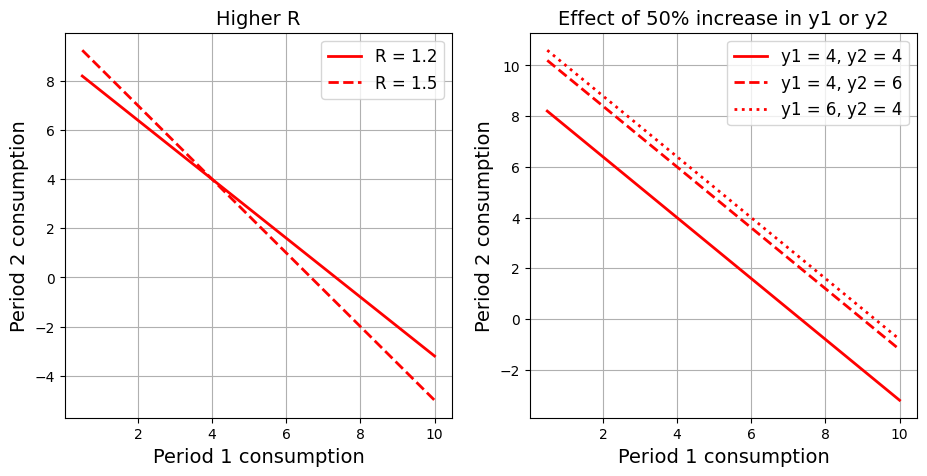

In [591]:
"""Plot budget lines for different values of income and the interest factor"""
# Create a range of values for current consumption
c1_values = np.linspace(0.5, 10, 100)

# Create a contour plot to visualize the indifference curve
fig, ax = plt.subplots(1, 2, figsize=(11, 5))
ax[0].set_xlabel('Period 1 consumption', fontsize=14)
ax[0].set_ylabel('Period 2 consumption', fontsize=14)
ax[0].set_title("Higher R", fontsize=14)

ax[1].set_xlabel('Period 1 consumption', fontsize=14)
ax[1].set_ylabel('Period 2 consumption', fontsize=14)
ax[1].set_title("Effect of 50% increase in y1 or y2", fontsize=14)

choice0 = IntertemporalChoice()

# Plot the budget constraint
ax[0].plot(c1_values, choice0.budget_line(), color='red', linewidth =2, label='R = 1.2') # default parameters
ax[1].plot(c1_values, choice0.budget_line(), color='red', linewidth =2, label='y1 = 4, y2 = 4') # default parameters

# Vary interest rate

pars1 = choice0.pars.copy()
pars1['R'] = 1.5 
choice1 = IntertemporalChoice(pars1)

ax[0].plot(c1_values, choice1.budget_line(), color='red', linewidth=2, linestyle='--', label='R = 1.5') # with higher R
ax[0].legend(fontsize=12)
ax[0].grid(True)

# Vary income in one period at a time

pars2 = choice0.pars.copy()
pars2['y2'] = 6 
choice2 = IntertemporalChoice(pars2)

pars3 = choice0.pars.copy()
pars3['y1'] = 6 
choice3 = IntertemporalChoice(pars3)

ax[1].plot(c1_values, choice2.budget_line(), color='red', linewidth=2, linestyle='--', label='y1 = 4, y2 = 6')
ax[1].plot(c1_values, choice3.budget_line(), color='red', linewidth=2, linestyle=':', label='y1 = 6, y2 = 4')
ax[1].legend(fontsize=12)
ax[1].grid(True)



This gives us our consumption possibilities, but does not tell us how much we should consume in each period to maximise utility. To see that, we plot intertemporal isoutility curves: lines showing the combinations of $c_1$ and $c_2$ consistent with any given level of lifetime utility. We choose to consume where the budget line is tangent to an isoutility line. We can also plot the line showing the optimal ratio of $c_2$ to $c_1$ according to the first order condition. The intersection of this line with the budget constraint gives us optimal feasible consumption. Finally, since the prices of the goods are measured in the same units as income, any point on the budget line gives us $y_1$ and $y_2$ consistent with this optimal consumption point. If $y_1$ is less than $c_1$, we have income left to save for period 2. Conversely, if $y_1$ is greater than $c_1$, we borrow to finance our optimal consumption in the first period and repay this in the second period.

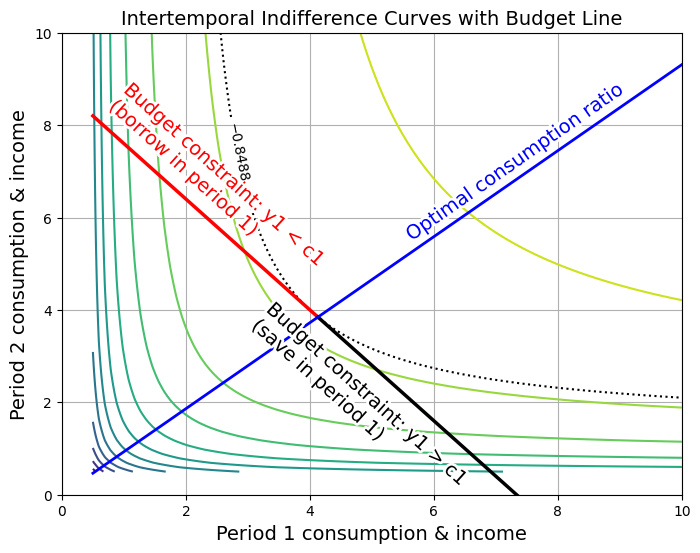

In [598]:
"""Show indifference curves and how the budget line intersects with the first order condition for optimal consumption."""

choice0 = IntertemporalChoice()

# Calculate utility for each combination of goods 1 and 2
utility_values = choice0.gridded_utility()

# Compute c1, c2 and u at the tangent of the budget line and the iso-utility curves
(c1star,c2star,ustar) = choice0.tangent_point()

# Compute values of c2 for values of c1 below and above the optimal consumption point
c1_borrow = np.linspace(0.5, c1star, 100)
budget_line_borrow = choice0.budget_constraint(c1_borrow)
c1_lend = np.linspace(c1star, 10, 100)
budget_line_lend = choice0.budget_constraint(c1_lend)

# Create a contour plot to visualize the indifference curve
plt.figure(figsize=(8, 6))

contour = plt.contour(choice0.linspace(), choice0.linspace(), choice0.gridded_utility(), levels=12)
contour = plt.contour(choice0.linspace(), choice0.linspace(), choice0.gridded_utility(), levels=np.array([ustar]), cmap='grey', linestyles=':')

plt.xlim(0, 10)
plt.ylim(0, 10)

plt.clabel(contour, inline=True, fontsize=10)
plt.xlabel('Period 1 consumption & income', fontsize=14)
plt.ylabel('Period 2 consumption & income', fontsize=14)
plt.title("Intertemporal Indifference Curves with Budget Line", fontsize=14)

# Plot the budget constraint
plt.plot(c1_borrow, budget_line_borrow, color='red', linewidth =2.5)
plt.plot(c1_lend, budget_line_lend, color='black', linewidth =2.5)

c1_line = choice0.linspace()
c2_line_income = choice0.c2_line()
plt.plot(c1_line, c2_line_income, color='blue', linewidth =2, linestyle='-')

angle_income = angle_degrees = np.degrees(np.arctan2(c2_line_income[-1] - c2_line_income[0], 
                                                     c1_line[-1] - c1_line[0])) 

plt.annotate('Optimal consumption ratio', xy=(5, 6), xytext=(5.5, 5.5),
               fontsize=14, rotation=35, color='blue',
            path_effects=[withStroke(linewidth=4, foreground='white')])

# Add an annotation for the budget line equation
plt.annotate('Budget constraint: y1 > c1 \n(save in period 1)',
             xy=(4, 2), xytext=(3, -0.25),  fontsize=14, 
             color='black', rotation = -42,
            path_effects=[withStroke(linewidth=4, foreground='white')])

plt.annotate('Budget constraint: y1 < c1 \n(borrow in period 1)',
             xy=(c1star-0.1, c2star-0.1), xytext=(0.7, 4.5),  fontsize=14, 
             color='red', rotation = -42,
            path_effects=[withStroke(linewidth=4, foreground='white')])

plt.grid(True)
plt.show()



Like $R$, the discount factor $\beta$ affects the optimal consumption ratio. Unlike $R$, $\beta$ does not affect the budget constraint. 

A discount factor closer to unity (implying a lower discount rate) shifts consumption towards period two, rotating the optimal consumption ratio line anti-clockwise. 

A larger interest factor rotates the consumption ratio anti-clockwise *and* rotates the budget constraint clockwise.

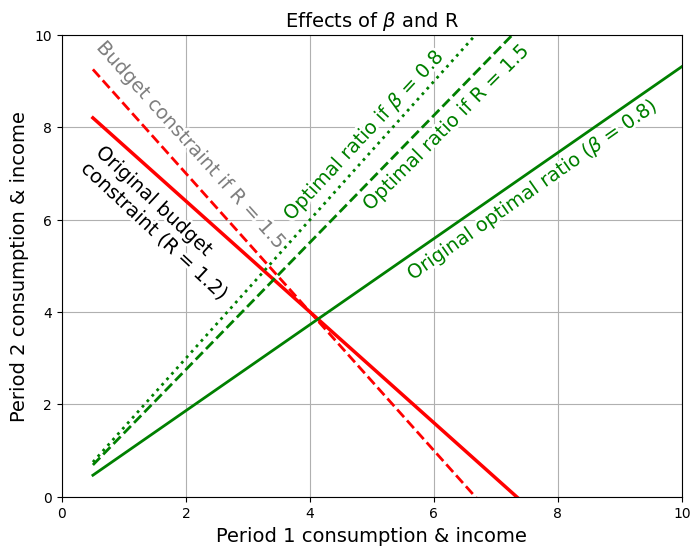

In [599]:
"""Show how the discount and interest factors affect the budget line and first order condition"""

choice0 = IntertemporalChoice()

parsb = choice0.pars.copy()
parsb['beta'] = 1.05 
choiceb = IntertemporalChoice(parsb)

parsr = choice0.pars.copy()
parsr['R'] = 1.5 
choicer = IntertemporalChoice(parsr)

# Calculate utility for each combination of goods 1 and 2
utility_values = choice0.gridded_utility()

# Compute c1, c2 and u at the tangent of the budget line and the iso-utility curves
(c1star,c2star,ustar) = choice0.tangent_point()

# Compute values of c2 for values of c1 below and above the optimal consumption point
c1_borrow = np.linspace(0.5, c1star, 100)
budget_line_borrow = choice0.budget_constraint(c1_borrow)
c1_lend = np.linspace(c1star, 10, 100)
budget_line_lend = choice0.budget_constraint(c1_lend)

c2_line_income0 = choice0.c2_line()
c2_line_incomeb = choiceb.c2_line()
c2_line_incomer = choicer.c2_line()


c1_line = choice0.linspace()

# Create a contour plot to visualize the indifference curve
plt.figure(figsize=(8, 6))

# Plot the budget constraint
plt.plot(c1_line, choice0.budget_line(), color='red', linewidth =2.5)


plt.xlim(0, 10)
plt.ylim(0, 10)

plt.clabel(contour, inline=True, fontsize=10)
plt.xlabel('Period 1 consumption & income', fontsize=14)
plt.ylabel('Period 2 consumption & income', fontsize=14)
plt.title(r"Effects of $\beta$ and R", fontsize=14)



plt.plot(c1_line, c2_line_income0, color='green', linewidth =2, linestyle='-')
plt.plot(c1_line, c2_line_incomeb, color='green', linewidth =2, linestyle=':')
plt.plot(c1_line, c2_line_incomer, color='green', linewidth =2, linestyle='--')

plt.plot(c1_line, choicer.budget_line(), color='red', linewidth =2, linestyle='--')

angle_income = angle_degrees = np.degrees(np.arctan2(c2_line_income[-1] - c2_line_income[0], 
                                                     c1_line[-1] - c1_line[0])) 

plt.annotate(r'Original optimal ratio ($\beta$ = 0.8)', xy=(5, 6), xytext=(5.5, 4.7),
               fontsize=14, rotation=35, color='green',
            path_effects=[withStroke(linewidth=4, foreground='white')])

plt.annotate(r'Optimal ratio if $\beta$ = 0.8', xy=(5, 6), xytext=(3.5, 6.0),
               fontsize=14, rotation=47, color='green',
            path_effects=[withStroke(linewidth=4, foreground='white')])

plt.annotate(r'Optimal ratio if R = 1.5', xy=(5, 6), xytext=(4.8, 6.2),
               fontsize=14, rotation=45, color='green',
            path_effects=[withStroke(linewidth=4, foreground='white')])

plt.annotate('Original budget\nconstraint (R = 1.2)', xy=(5, 3), xytext=(0.25, 4.25),
               fontsize=14, rotation=-43, color='black',
            path_effects=[withStroke(linewidth=4, foreground='white')])

plt.annotate(r'Budget constraint if R = 1.5', xy=(5, 6), xytext=(0.5, 5.35),
               fontsize=14, rotation=-48, color='grey',
            path_effects=[withStroke(linewidth=4, foreground='white')])

plt.grid(True)
plt.show()



How does the coefficient of risk aversion $\eta$, which is also the inverse intertemporal elasticity of substitution (IES) here, affect optimal choices? 

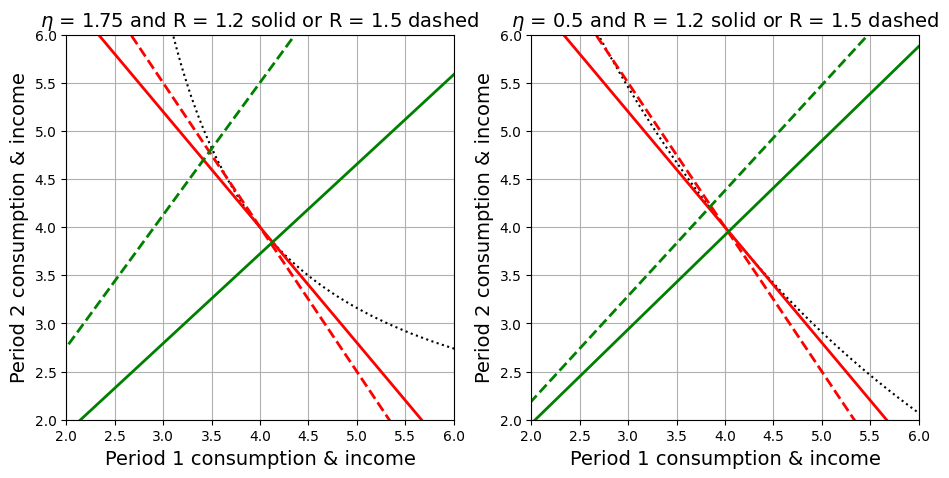

In [600]:
"""Show how the coefficient of risk aversion (or the inverse IES) affects the budget line and first order condition, hence optimum consumption"""

choice0 = IntertemporalChoice()

pars1 = choice0.pars.copy()
pars1['R'] = 1.5 
choice1 = IntertemporalChoice(pars1)

parse = choice0.pars.copy()
parse['eta'] = 0.5 
choicee = IntertemporalChoice(parse)

parse1 = choicee.pars.copy()
parse1['R'] = 1.5 
choicee1 = IntertemporalChoice(parse1)

# Calculate utility for each combination of goods 1 and 2
utility_values = choice0.gridded_utility()
utility_valuese = choicee.gridded_utility()

# Compute c1, c2 and u at the tangent of the budget line and the iso-utility curves
(c1star,c2star,ustar) = choice0.tangent_point()

# Compute values of c2 for values of c1 below and above the optimal consumption point
c1_borrow = np.linspace(0.5, c1star, 100)
budget_line_borrow = choice0.budget_constraint(c1_borrow)
c1_lend = np.linspace(c1star, 10, 100)
budget_line_lend = choice0.budget_constraint(c1_lend)

# Create a contour plot to visualize the indifference curve
fig, ax = plt.subplots(1,2, figsize=(11, 5))

#contour = ax[0].contour(choice0.linspace(), choice0.linspace(), choice0.gridded_utility(), levels=23)
#contoure = ax[1].contour(choicee.linspace(), choicee.linspace(), choicee.gridded_utility(), levels=23)
contour = ax[0].contour(choice0.linspace(), choice0.linspace(), choice0.gridded_utility(), levels=np.array([choice0.tangent_point()[2]]), 
                      colors='black', linestyles=':')
contour = ax[1].contour(choicee.linspace(), choice0.linspace(), choicee.gridded_utility(), levels=np.array([choicee.tangent_point()[2]]), 
                      colors='black', linestyles=':')


ax[0].set_xlim(2, 6)
ax[0].set_ylim(2, 6)
ax[1].set_xlim(2, 6)
ax[1].set_ylim(2, 6)

ax[0].clabel(contour, inline=True, fontsize=10)
ax[0].set_xlabel('Period 1 consumption & income', fontsize=14)
ax[0].set_ylabel('Period 2 consumption & income', fontsize=14)
ax[0].set_title(r'$\eta$ = 1.75 and R = 1.2 solid or R = 1.5 dashed', fontsize=14)
#ax[0].set_subtitle(r"R=1.2 solid, R=1.5 dashed", fontsize=14)
ax[1].clabel(contoure, inline=True, fontsize=10)
ax[1].set_xlabel('Period 1 consumption & income', fontsize=14)
ax[1].set_ylabel('Period 2 consumption & income', fontsize=14)
ax[1].set_title(r'$\eta$ = 0.5 and R = 1.2 solid or R = 1.5 dashed', fontsize=14)

# Plot the budget constraint
ax[0].plot(choice0.linspace(), choice0.budget_line(), color='red', linewidth =2)
ax[1].plot(choicee.linspace(), choicee.budget_line(), color='red', linewidth =2)

ax[0].plot(choice1.linspace(), choice1.budget_line(), color='red', linewidth =2, linestyle='--')
ax[1].plot(choicee1.linspace(), choicee1.budget_line(), color='red', linewidth =2, linestyle='--')

ax[0].plot(choice0.linspace(), choice0.c2_line(), color='green', linewidth =2, linestyle='-')
ax[1].plot(choicee.linspace(), choicee.c2_line(), color='green', linewidth =2, linestyle='-')

ax[0].plot(choice1.linspace(), choice1.c2_line(), color='green', linewidth =2, linestyle='--')
ax[1].plot(choicee1.linspace(), choicee1.c2_line(), color='green', linewidth =2, linestyle='--')

#ax[0].plot(


ax[0].grid(True)
ax[1].grid(True)
plt.show()

